# 1. Import Library

In [22]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [66]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [67]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [68]:
x_img_train.shape

(50000, 32, 32, 3)

In [69]:
y_label_train.shape

(50000, 1)

In [7]:
x_img_test.shape

(10000, 32, 32, 3)

In [46]:
x_img_traindata=x_img_train
y_label_traindata=y_label_train
x_img_traindata=x_img_traindata[0:1000]
y_label_traindata=y_label_traindata[0:1000]

In [54]:
import random
for x in range (0,len(x_img_traindata),1):
    for y in range (0,len(x_img_traindata[x]),1):
        x_img_traindata[x][y]=y
        for z in range (0,len(x_img_traindata[x][y]),1):
            x_img_traindata[x][y][z]=z+y
            for c in range (0,len(x_img_traindata[x][y][z]),1):
                x_img_traindata[x][y][z][c]=(3+y+z)%255
                
                #print ("level1:%s level2:%s level3:%s level4:%s" %(x ,y,z,c))

In [70]:
x_img_traindata.shape
y_label_traindata.shape
x_img_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ..., 
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ..., 
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ..., 
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ..., 
       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ..., 
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ..., 
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ..., 
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,

In [71]:
x_img_train=x_img_traindata
y_label_train=y_label_traindata

In [72]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ..., 
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ..., 
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ..., 
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ..., 
       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ..., 
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ..., 
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ..., 
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67,

In [73]:
y_label_test.shape

(10000, 1)

In [74]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [75]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

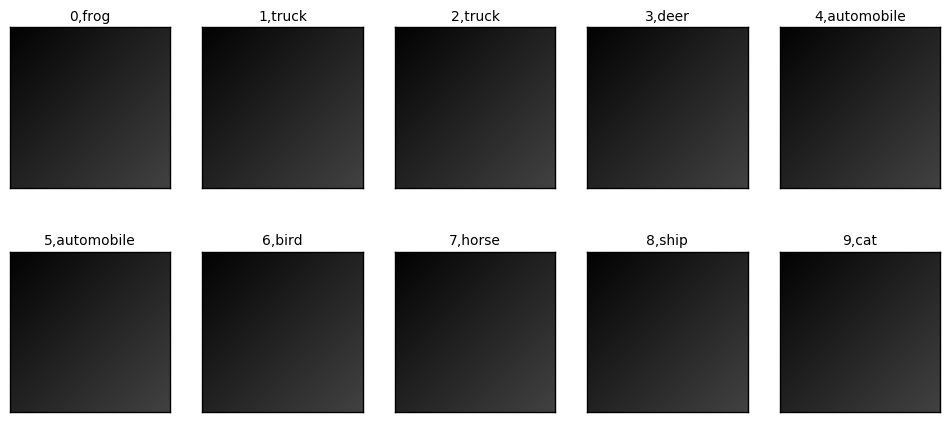

In [76]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [57]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [58]:
x_img_train[0][0][0]

array([3, 3, 3], dtype=uint8)

In [59]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [60]:
x_img_train_normalize[0][0][0]

array([ 0.01176471,  0.01176471,  0.01176471], dtype=float32)

# 轉換label 為OneHot Encoding

In [61]:
y_label_train.shape

(1000, 1)

In [62]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [63]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [64]:
y_label_train_OneHot.shape

(1000, 10)

In [65]:
y_label_train_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])